# MileStone Project 2 

the purpsoe of the notebook is to make easier to read the medical papers easier (NLP problem) 

Research paper trying to replicate : https://arxiv.org/pdf/1710.06071.pdf

Neural network which we're trying to build: https://www.aclweb.org/anthology/E17-2110.pdf

going to use : 
* transfer learning 


> this is problem type of many to one 

the sections which we're defining :
* background
* objective 
* methods 
* results 
* conclusion 



for downloading the dataset:https://github.com/Franck-Dernoncourt/pubmed-rct.git

Daniels model :  https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip


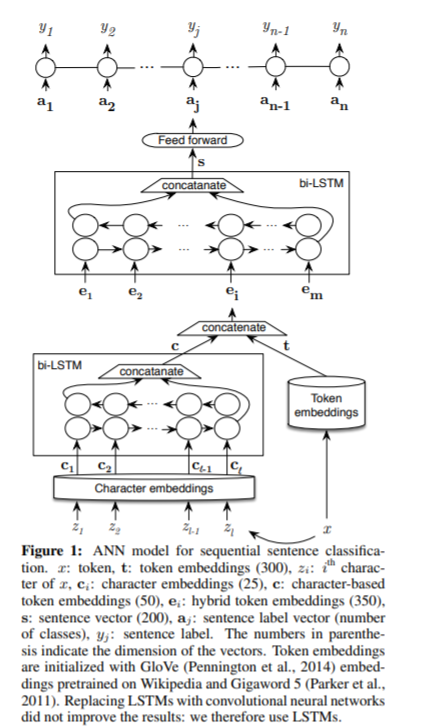

# importing the required modules 

In [ ]:
!nvidia-smi

Fri Jun 18 07:50:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow_hub as hub 

data flow : 

inputs ----------> skimlit model -----------> outputs 

inputs ( embedded and text vectorized ) (maybe using the USE ) 

the outputs shape size will vary on the types of the embeddings which we're deciding to use and the problem which we're trying to solve 

the text and images can't be handled we needed them to represent in the numerical format 


making sure the all the tensors are in the equal shapes while passing it in the form of the batches 

we could make it as the google chrome extension or discord bot or streamlit io share app 

# getting the data in 


In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.


In [ ]:
ls pubmed-rct

PubMed_200k_RCT/
PubMed_200k_RCT_numbers_replaced_with_at_sign/
PubMed_20k_RCT/
PubMed_20k_RCT_numbers_replaced_with_at_sign/
README.md


In [ ]:
f = open('pubmed-rct/README.md')

In [ ]:
for x in f : 
  print(x)

# PubMed 200k RCT dataset



The PubMed 200k RCT dataset is described in *Franck Dernoncourt, Ji Young Lee. [PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts](https://arxiv.org/abs/1710.06071). International Joint Conference on Natural Language Processing (IJCNLP). 2017.*



Abstract:



> PubMed 200k RCT is new dataset based on PubMed for sequential sentence classification. The dataset consists of approximately 200,000 abstracts of randomized controlled trials, totaling 2.3 million sentences. Each sentence of each abstract is labeled with their role in the abstract using one of the following classes: background, objective, method, result, or conclusion. The purpose of releasing this dataset is twofold. First, the majority of datasets for sequential short-text classification (i.e., classification of short texts that appear in sequences) are small: we hope that releasing a new large dataset will help develop more accurate algorithms for this task. S

In [ ]:
!ls /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
# starting the experiemnts using the 20 K dataset (original 200K ) with the numbers replaced by the @ sign 
# building the dataset requires a lot of the work most of the times when the datasets are not ready we have to put lot of work in just to create the dataset 


In [ ]:
datadir = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [ ]:
# checking the filenames in the target directory 
import os 
file_names = [datadir + filename for filename in os.listdir(datadir)]

In [ ]:
file_names

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

preprocessing the data now we've got some data it's time to becoming one with the data 
and one of the best of the way is to see the what data actually constists of

In [ ]:
# let's write the functions to read in all of the lines of target text 

def get_lines(filename):
  with open(filename,'r') as f: 
    return f.readlines()

In [ ]:
# reading lines in the training lines 
train_lines = get_lines(datadir + 'train.txt')

In [ ]:
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
!nvidia-smi

Fri Jun 18 07:50:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# how the data can be represented 

```
[{'line_number':0,
'target':'BACKGROUND',
'text' : 'emotional eating is associated with eth overeating adn the development of obesity ' ,
'total_lines' : 11 },
...]
```

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """ 
  returns the list of the dictionary's of the abstarct line data 

  takes in file names and read it's contents and sort thorugh each lines
  extract things like the target label, text of the scentece , how many scentences are there in the focused abstract and what number the target liens is 

  """ 
  input_lines = get_lines(filename) # getting all the file names 
  abstract_lines = ""  # creating the empty abstract 
  abstract_samples = [] # creating the empty list of the abstract

  #looping through each lines in input)lines  

  for line in input_lines:
    if line.startswith('###'):
      abstract_id = line 
      abstract_lines = "" # resetting the abstract string if the lines is an id line 
    elif line.isspace():  # check to see if the line is the new line
       abstract_line_split = abstract_lines.splitlines() # splitting the abstract into sepearte lines 
       # iterate through each line in a single abstract 
       for abstract_line_number , abstract_line in enumerate(abstract_line_split):
         line_data = {} # create the empty dict for each line 
         target_text_split = abstract_line.split("\t") # splitting the target label with the tab 
         line_data['target'] = target_text_split[0]
         line_data['text'] = target_text_split[1].lower()
         line_data['line_number'] = abstract_line_number # what number does the line appear in the abstract 
         line_data['total_lines'] = len(abstract_line_split)- 1 # how many total liens are there in the target abstract 
         abstract_samples.append(line_data) # adding line data to the array to make the dictionary format 
    else: 
      abstract_lines += line
  return abstract_samples

In [ ]:
%%time
train_samples = preprocess_text_with_line_numbers(datadir + 'train.txt')
val_samples = preprocess_text_with_line_numbers(datadir + 'dev.txt')
test_samples = preprocess_text_with_line_numbers(datadir + 'test.txt')


CPU times: user 367 ms, sys: 76.6 ms, total: 444 ms
Wall time: 446 ms


In [ ]:
len(train_samples), len(val_samples),len(test_samples)

(180040, 30212, 30135)

In [ ]:
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
val_df.head()

,target,text,line_number,total_lines
0,BACKGROUND,ige sensitization to aspergillus fumigatus and...,0,9
1,BACKGROUND,it is not clear whether these patients would b...,1,9
2,OBJECTIVE,we sought to determine whether a @-month cours...,2,9
3,METHODS,asthmatic patients who were ige sensitized to ...,3,9
4,METHODS,primary outcomes were improvement in quality o...,4,9


In [ ]:
!nvidia-smi

Fri Jun 18 07:50:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# distribution of the lables in the training data 
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

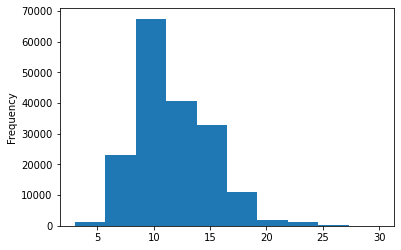

In [ ]:
# length of the different lines 
train_df.total_lines.plot.hist()

# Getting list of all the scentences 

In [ ]:
# convert the abstract text liens into the lists 
train_scentences = train_df.text.tolist()
val_scentences = val_df.text.tolist()
test_scentences = test_df.text.tolist()

In [ ]:
len(train_scentences),len(val_scentences),len(test_scentences)

(180040, 30212, 30135)

## making the numeric labels ( numeric labels as well as the numeric data are required for ml algo to run) 


In [ ]:
# one hot encode labels 
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder( sparse= False)  # we want non sparse matrix 
train_labels_one_hot = one_hot_encoder.fit_transform(train_df.target.to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df.target.to_numpy().reshape(-1,1))
test_labes_one_hot = one_hot_encoder.transform(test_df.target.to_numpy().reshape(-1,1))

# label encode labels 

In [ ]:
# extract labels (target columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
train_labels_encoded = label_encoder.fit_transform(train_df.target.to_numpy())
val_labels_encoded = label_encoder.transform(val_df.target.to_numpy())
test_labels_encoded = label_encoder.transform(test_df.target.to_numpy())

In [ ]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
# getting classnames and the number of classes from label encoder instance 
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## starting with the series of modelling experiments 
As usual we're going to be trying out the bunch of different models and seeing which one works best 
and as always we are gonna start with the baseline model with scikit-learn

## Model_0 : Getting the baseline 

In [ ]:
  ## model_0 getting the baseline Tfidf multinomial naive bayes classifier 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# creating the pipelien 
model_0 = Pipeline([
                    ('tf-idf',TfidfVectorizer()),
                    ('clf',MultinomialNB())
])

# fitting the pipeline to the training data 
model_0.fit(X = train_scentences, y= train_labels_encoded)

Pipeline(memory=None,
         steps=[('tf-idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# evaluating the baseline model wiht the validation_dataset 
model_0.score(X = val_scentences,y = val_labels_encoded)

0.7218323844829869

In [ ]:
# making the predictions with the baseline model 
baseline_preds = model_0.predict(val_scentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
val_labels_encoded

array([0, 0, 3, ..., 4, 1, 1])

### Downloading the helper function script 

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-06-18 07:50:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-06-18 07:50:33 (98.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
# calculating the baseline results 
baseline_results = calculate_results(y_true= val_labels_encoded,y_pred = baseline_preds)

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

## Model 2 conv 1d model with the token embedding 

In [ ]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras import layers

In [ ]:
# how long is each scentence on average ? 
scen_lens = [len(sentence.split()) for sentence in train_scentences]
avg_sent_len = np.mean(scen_lens)
avg_sent_len

26.338269273494777

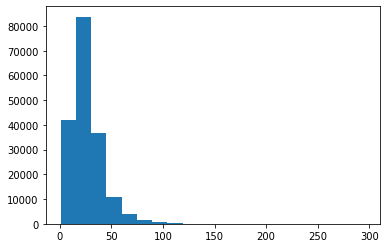

In [ ]:
# what does the distribution looks now ? 
import matplotlib.pyplot as plt 
plt.hist(scen_lens,bins = 20);

In [ ]:
# how long of the scentence length covers the 95 % of the examples ? 
output_seq_len = int(np.percentile(scen_lens,95))

In [ ]:
output_seq_len

55

In [ ]:
# maximum scentence length is ? 
max(scen_lens)

296

In [ ]:
# max_tokens are hte number of the words which were can be passed for the going for number of the vocab 

# how many words are in the vocabulary 
max_tokens = 68000

vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens= max_tokens,output_sequence_length=55)
vectorizer.adapt(train_scentences)

# embedding = tf.keras.layers.Embedding(output_dim = (1,512))


In [ ]:
vocab = vectorizer.get_vocabulary()
print(f'total number of words in vocab {len(vocab)}')
print(f'the most used words in the vocab are {vocab[:10]}')
print(f'the least used words in the vocab are {vocab[-10:]}')

total number of words in vocab 64841
the most used words in the vocab are ['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']
the least used words in the vocab are ['aarm', 'aaqol', 'aaq', 'aanhui', 'aana', 'aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
import random 
target_scentence = random.choice(train_scentences)
print(f'text: {target_scentence}')
print(f'length of text : {len(target_scentence)}')
print(f'vectorized text: {vectorizer([target_scentence])}')

text: low complications rate in linked stent group , despite the lack of significant statistical differences , but indicate the effectiveness and success of the new technique .
length of text : 170
vectorized text: [[ 220  296   78    5 2362  788   13  643    2 1207    4   37  462  102
    72 1122    2  257    3  611    4    2  319  475    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [ ]:
# getting the config of the text vectorizer 
vectorizer.get_config()

{'dtype': 'string',
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary_size': 64841}

In [ ]:
embedding = tf.keras.layers.Embedding(input_dim = len(train_df),output_dim= 128 # different embedding sizes results in the drastically different number of parameters to train 
                                      ,mask_zero = True, name = 'token_embeddings'
                                      )

In [ ]:
print(f'scentence before vectorization = {target_scentence} ')
vectorized_scentence = vectorizer([target_scentence])
print(f'scentence after vectorization before embedding {vectorized_scentence}')
embedded_scentence = embedding(vectorized_scentence)
print(f'scentene after embedding {embedded_scentence} with shape ### {embedded_scentence.shape}')

scentence before vectorization = low complications rate in linked stent group , despite the lack of significant statistical differences , but indicate the effectiveness and success of the new technique . 
scentence after vectorization before embedding [[ 220  296   78    5 2362  788   13  643    2 1207    4   37  462  102
    72 1122    2  257    3  611    4    2  319  475    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]
scentene after embedding [[[-0.03688439  0.03744685  0.04248308 ... -0.03564443  0.02208631
   -0.02925852]
  [-0.02097845  0.01437891 -0.01576426 ... -0.02731661  0.03814975
   -0.01507609]
  [-0.01419375 -0.02621944 -0.01450839 ...  0.02880578  0.04430607
    0.01028436]
  ...
  [ 0.03669927  0.03919343 -0.00445329 ...  0.03577163  0.02177875
    0.03676308]
  [ 0.03669927  0.03919343 -0.00445329 ...  0.03577163  0.02177875
    0.03676308]
  [ 0.03669927  0

# creating the datasets 
turning the data into the tensorflwo datset 

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_scentences,train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_scentences,val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_scentences,test_labes_one_hot))

train_dataset

<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

In [ ]:
# building the model 
inputs = tf.keras.layers.Input(shape = (1,),dtype = "string")
x = vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(128,3,1,padding ='same',activation = 'relu')(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
outputs = tf.keras.layers.Dense(len(label_encoder.classes_),activation = 'softmax')(x)
model_1 = tf.keras.Model(inputs,outputs)

In [ ]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
token_embeddings (Embedding) (None, 55, 128)           23045120  
_________________________________________________________________
conv1d (Conv1D)              (None, 55, 128)           49280     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 23,095,045
Trainable params: 23,095,045
Non-trainable params: 0
_________________________________________________

In [ ]:
history_model_1 = model_1.fit(train_dataset,
                              steps_per_epoch = int(0.1 * len(train_dataset)),
                              validation_data = valid_dataset,
                              validation_steps = int(0.1 * len(valid_dataset)),
                              epochs =5 , 
                              callbacks = [tf.keras.callbacks.TensorBoard('logs/conv_1D_model_1')]
                              )

Epoch 1/5
562/562 [==============================] - 137s 216ms/step - loss: 0.8212 - accuracy: 0.6900 - val_loss: 0.5838 - val_accuracy: 0.7866
Epoch 2/5
562/562 [==============================] - 120s 213ms/step - loss: 0.5805 - accuracy: 0.7874 - val_loss: 0.5402 - val_accuracy: 0.7969
Epoch 3/5
562/562 [==============================] - 120s 213ms/step - loss: 0.5472 - accuracy: 0.7992 - val_loss: 0.5209 - val_accuracy: 0.8128
Epoch 4/5
562/562 [==============================] - 119s 212ms/step - loss: 0.5257 - accuracy: 0.8092 - val_loss: 0.5214 - val_accuracy: 0.8052
Epoch 5/5
562/562 [==============================] - 119s 212ms/step - loss: 0.5305 - accuracy: 0.8085 - val_loss: 0.4900 - val_accuracy: 0.8208


In [ ]:
model_1_eval = model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.4948 - accuracy: 0.8200


In [ ]:
model_1_eval

[0.49478647112846375, 0.820038378238678]

In [ ]:
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs , model_1_pred_probs.shape

(array([[6.78992391e-01, 2.01117367e-01, 1.94759190e-03, 1.12534255e-01,
         5.40843001e-03],
        [4.14350837e-01, 4.55470115e-01, 7.43524963e-03, 1.00427985e-01,
         2.23157145e-02],
        [3.36420238e-01, 1.67239252e-02, 7.36589264e-03, 6.39051139e-01,
         4.38753108e-04],
        ...,
        [7.38751725e-04, 1.48872961e-03, 1.29585741e-02, 4.82998381e-04,
         9.84330952e-01],
        [1.03171533e-02, 6.18696094e-01, 4.86814417e-02, 6.13754010e-03,
         3.16167772e-01],
        [3.98453623e-02, 9.50494885e-01, 6.22401107e-03, 7.52597407e-04,
         2.68317061e-03]], dtype=float32), (30212, 5))

In [ ]:
model_1_preds = tf.argmax(model_1_pred_probs, axis = 1 )
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 1, 1])>

In [ ]:
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [ ]:
# calculating the model_1 results 
model_1_results = calculate_results(y_true = val_labels_encoded,
                                    y_pred = model_1_preds)

In [ ]:
model_1_results

{'accuracy': 82.00383953396002,
 'f1': 0.8180808740556857,
 'precision': 0.8206592813659764,
 'recall': 0.8200383953396002}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

In [ ]:
# model_1.save('/content/drive/MyDrive/SOM_models/SKIM_LIT/conv_1D_model_1')

In [ ]:
# loaded_model_1 = tf.keras.models.load_model('/content/drive/MyDrive/SOM_models/SKIM_LIT/conv_1D_model_1')

In [ ]:
# loaded_model_1.evaluate(valid_dataset)

# Model_2 Feature extraction model with pretrained token embeddings 


In [ ]:
import tensorflow_hub as hub 

In [ ]:
embed_model = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',trainable = False)

In [ ]:
inputs = tf.keras.layers.Input(shape = [],dtype = 'string')
x = embed_model(inputs)
x = layers.Dense(128, activation = 'relu')(x)
# x = tf.keras.layers.Conv1D(128,3,1,padding= 'same',activation = 'relu')(x)
# x = tf.keras.layers.GlobalMaxPool1D()(x)
outputs = tf.keras.layers.Dense(len(label_encoder.classes_),activation = 'sigmoid')(x)

model_2 = tf.keras.Model(inputs,outputs)


In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_2.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_2_history = model_2.fit(train_dataset ,
                              steps_per_epoch = int(0.1 * len(train_dataset)),
                              validation_data= valid_dataset, 
                              validation_steps = int(0.1 * len(valid_dataset)),
                              epochs = 5 , 
                              callbacks = [tf.keras.callbacks.TensorBoard('/logs/feature_extr_model_2')]
                              )

Epoch 1/5
562/562 [==============================] - 10s 12ms/step - loss: 0.9130 - accuracy: 0.6511 - val_loss: 0.7959 - val_accuracy: 0.6922
Epoch 2/5
562/562 [==============================] - 6s 10ms/step - loss: 0.7687 - accuracy: 0.7026 - val_loss: 0.7543 - val_accuracy: 0.7111
Epoch 3/5
562/562 [==============================] - 6s 10ms/step - loss: 0.7529 - accuracy: 0.7118 - val_loss: 0.7395 - val_accuracy: 0.7138
Epoch 4/5
562/562 [==============================] - 6s 10ms/step - loss: 0.7201 - accuracy: 0.7263 - val_loss: 0.7118 - val_accuracy: 0.7307
Epoch 5/5
562/562 [==============================] - 6s 10ms/step - loss: 0.7277 - accuracy: 0.7200 - val_loss: 0.6914 - val_accuracy: 0.7374


In [ ]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 8s 9ms/step - loss: 0.7000 - accuracy: 0.7338


[0.7000380754470825, 0.7338143587112427]

In [ ]:
# model_2.save('/content/drive/MyDrive/SOM_models/SKIM_LIT/feature_extr_model_2')

In [ ]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

array([[0.8804268 , 0.7356254 , 0.02915224, 0.60171807, 0.09259342],
       [0.8697912 , 0.86888665, 0.0664397 , 0.55471605, 0.02728363],
       [0.7022623 , 0.27195865, 0.25912046, 0.7499568 , 0.22137956],
       ...,
       [0.05147926, 0.05014388, 0.72903705, 0.01505154, 0.9651286 ],
       [0.03536526, 0.28128085, 0.87619597, 0.01100625, 0.8894365 ],
       [0.49348387, 0.70274824, 0.68360865, 0.01480405, 0.19498643]],
      dtype=float32)

In [ ]:
model_2_preds = tf.argmax(model_2_pred_probs, axis = 1 ) 
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_2_results = calculate_results(val_labels_encoded,model_2_preds)
model_2_results

{'accuracy': 73.38143783926915,
 'f1': 0.7279536166464092,
 'precision': 0.7299690340374074,
 'recall': 0.7338143783926916}

# model_3 conv1D with the character embeddings 

the paper which we're replicating state to be using the combination of the token level and character level embedding  we need to do similar step for character so that if we wantto use char-level embedding 

### creating the character level embedding 

In [ ]:
def split_char(text):
  return " ".join(list(text))

In [ ]:
split_char(train_scentences[0])

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [ ]:
train_chars = [split_char(scentence) for scentence in train_scentences]
val_chars = [split_char(scentence) for scentence in val_scentences]
test_chars = [split_char(scentence) for scentence in test_scentences]

In [ ]:
# finding the average character lenght 
char_length = [len(scentence) for scentence in train_scentences]
mean_char_length = np.mean(char_length)
mean_char_length

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <a list of 7 Patch objects>)

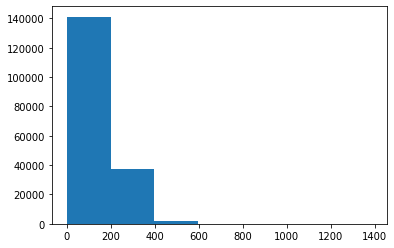

In [ ]:
# checking out the distribution of the character level encoddign 
plt.hist(char_length,bins = 7 )

In [ ]:
np.percentile(char_length, 95)

290.0

In [ ]:
# building the text vectorization layer 
#getting all the keyboard characters 
import string 
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
len(alphabet)

68

In [ ]:
# creating the char level token vectorizer instance 
NUM_CHAR_TOKEN = len(alphabet) + 2 
char_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens = NUM_CHAR_TOKEN,
                                                                               output_sequence_length = 290 , 
                                                                              #  standardize = None, set standardization to none if you need to leave the punctuations out
                                                                               name = 'char_vectorizer')

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()

In [ ]:
char_vocab

['',
 '[UNK]',
 'e',
 't',
 'i',
 'a',
 'n',
 'o',
 'r',
 's',
 'd',
 'c',
 'l',
 'h',
 'p',
 'm',
 'u',
 'f',
 'g',
 'y',
 'w',
 'v',
 'b',
 'k',
 'x',
 'z',
 'q',
 'j']

In [ ]:
len(char_vocab)

28

In [ ]:
print(f'five most common character {char_vocab[:5]}')

five most common character ['', '[UNK]', 'e', 't', 'i']


In [ ]:
print(f'five least common characters {char_vocab[-5:]}')

five least common characters ['k', 'x', 'z', 'q', 'j']


In [ ]:
random_train_choice = random.choice(train_chars)
print(f'charafied text : {random_train_choice}')
print(f'length of the random train chars {len(random_train_choice)}')
vectorized_chars = char_vectorizer([random_train_choice])
print(f'vectorized chars : {vectorized_chars}')
print(f'length of the chars : {len(vectorized_chars)}')


charafied text : o t h e r   m e a s u r e m e n t s   ,   n a m e l y   d o r s i f l e x i o n   a n d   p l a n t a r   f l e x i o n   ,   r e f e r r e d   t o   a s   m o b i l e   a r m   ,   w e r e   t a k e n   f r o m   t h e   n p   .
length of the random train chars 229
vectorized chars : [[ 7  3 13  2  8 15  2  5  9 16  8  2 15  2  6  3  9  6  5 15  2 12 19 10
   7  8  9  4 17 12  2 24  4  7  6  5  6 10 14 12  5  6  3  5  8 17 12  2
  24  4  7  6  8  2 17  2  8  8  2 10  3  7  5  9 15  7 22  4 12  2  5  8
  15 20  2  8  2  3  5 23  2  6 17  8  7 15  3 13  2  6 14  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0

In [ ]:
# creating the character level embedding layer 

char_embedding = tf.keras.layers.Embedding(input_dim = len(char_vocab),
                                                 output_dim = 25 , 
                                                 mask_zero = True, 
                                                 name = 'char_embed'# this was the size of the char embedding in the paper 
)

                                                 

In [ ]:
print(f'charfied text \n {random_train_choice} \n')
char_embed_example = char_embedding(char_vectorizer([random_train_choice]))
print(f'Embeded scentence \n after embedding \n {char_embed_example} \n with shape {char_embed_example.shape}')

charfied text 
 o t h e r   m e a s u r e m e n t s   ,   n a m e l y   d o r s i f l e x i o n   a n d   p l a n t a r   f l e x i o n   ,   r e f e r r e d   t o   a s   m o b i l e   a r m   ,   w e r e   t a k e n   f r o m   t h e   n p   . 

Embeded scentence 
 after embedding 
 [[[-0.04829017  0.04015348  0.02137205 ... -0.04222958 -0.02572069
    0.02077583]
  [ 0.00618495  0.03241612  0.04735991 ...  0.01480872 -0.04050165
    0.0103845 ]
  [-0.02366201 -0.02088981 -0.01197679 ...  0.03795434  0.03864534
    0.02682725]
  ...
  [-0.04022665 -0.0452114  -0.0179853  ...  0.03235774 -0.00581863
    0.0094203 ]
  [-0.04022665 -0.0452114  -0.0179853  ...  0.03235774 -0.00581863
    0.0094203 ]
  [-0.04022665 -0.0452114  -0.0179853  ...  0.03235774 -0.00581863
    0.0094203 ]]] 
 with shape (1, 290, 25)


In [ ]:
# average_size = []
# for i in (train_scentences):
#   array = [len(z) for z in i.split()]
#   average_size.append(np.mean(array))

# np.mean(average_size)

In [ ]:
inputs = tf.keras.layers.Input(shape = (1,) , dtype = "string")
x = char_vectorizer(inputs)
x = char_embedding(x)
x = tf.keras.layers.Conv1D(64,5,1,padding = 'same', activation = 'relu')(x) 
x = tf.keras.layers.GlobalMaxPool1D()(x)
outputs = tf.keras.layers.Dense(len(label_encoder.classes_),activation = 'sigmoid')(x)
model_3 = tf.keras.Model(inputs,outputs)

In [ ]:
model_3.compile(loss =tf.keras.losses.categorical_crossentropy,
                optimizer  = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# creting the char level datset 
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
valid_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars,test_labes_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_3_history = model_3.fit(
    train_char_dataset, 
    steps_per_epoch = int(0.1 * len(train_char_dataset)), 
    validation_data = valid_char_dataset, 
    validation_steps = int(0.1 * len(valid_char_dataset)),
    epochs = 5 , 
    callbacks = [tf.keras.callbacks.TensorBoard('logs/model_3_char_level_embedding')]
)

Epoch 1/5
562/562 [==============================] - 17s 6ms/step - loss: 1.2665 - accuracy: 0.4850 - val_loss: 1.0496 - val_accuracy: 0.5921
Epoch 2/5
562/562 [==============================] - 3s 5ms/step - loss: 1.0087 - accuracy: 0.6036 - val_loss: 0.9402 - val_accuracy: 0.6366
Epoch 3/5
562/562 [==============================] - 3s 5ms/step - loss: 0.9225 - accuracy: 0.6442 - val_loss: 0.8645 - val_accuracy: 0.6742
Epoch 4/5
562/562 [==============================] - 3s 5ms/step - loss: 0.8739 - accuracy: 0.6634 - val_loss: 0.8350 - val_accuracy: 0.6868
Epoch 5/5
562/562 [==============================] - 3s 5ms/step - loss: 0.8521 - accuracy: 0.6713 - val_loss: 0.8087 - val_accuracy: 0.6958


In [ ]:
model_3.evaluate(valid_char_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.8301 - accuracy: 0.6824


[0.8301074504852295, 0.6824109554290771]

In [ ]:
model_3_preds = model_3.predict(valid_char_dataset)

In [ ]:
model_3_preds

array([[0.6227874 , 0.7292733 , 0.25771996, 0.78548557, 0.057345  ],
       [0.71955645, 0.94024265, 0.03475439, 0.60782045, 0.0973791 ],
       [0.17366858, 0.31747946, 0.39356396, 0.34350452, 0.05433313],
       ...,
       [0.1743692 , 0.2651955 , 0.3267743 , 0.12747078, 0.88530934],
       [0.11708692, 0.18125091, 0.5855047 , 0.05464514, 0.6771401 ],
       [0.74446636, 0.85900277, 0.52057654, 0.40071815, 0.07039589]],
      dtype=float32)

In [ ]:
model3_pred = tf.argmax(model_3_preds,axis = 1 )

In [ ]:
model3_pred

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 1, 2, ..., 4, 4, 1])>

In [ ]:
model_3_score  = calculate_results(val_labels_encoded, model3_pred)
model_3_score

{'accuracy': 68.24109625314445,
 'f1': 0.6780824455155756,
 'precision': 0.6824675669903801,
 'recall': 0.6824109625314445}

In [ ]:
# model_3.save('/content/drive/MyDrive/SOM_models/SKIM_LIT/model_3_char_level_embeddings')

# Model_4 : Combininf pretrained token embeddings and the character embedding 
1. create the token level embedding ( similar to `model_1` ) 
2. we've to create the character level model ( simliar to `model_3`) 
3. combine the both of 1 and 2 with concatenate (`layers.Concatenate`) 
4. build a series of the output layers for making the predictions similar to the paper figure 
5. extract the model which takes toekn and character level sequences as the inputs and label probabilities as output 


In [ ]:
# setting up the toekns as inputs/outputs 
token_inputs = tf.keras.layers.Input(shape = [], dtype =tf.string, name = 'token_input')
token_embedding = embed_model(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation = 'relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_outputs)

# setting up the char inputs/ model  
char_inputs = tf.keras.layers.Input(shape = (1,), dtype= 'string')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embedding(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

# 3. combining the both of the model 
token_char_concat = tf.keras.layers.Concatenate(axis = 1, name = 'token_char_hybrrid')([token_model.output, char_model.output])

# 4. creating the output layers - adding the dropout , discussed in the section 4.2 
combined_dropout = tf.keras.layers.Dropout(0.5)(token_char_concat)
combined_dense = tf.keras.layers.Dense(128, activation = 'relu')(combined_dropout)
final_dropout = tf.keras.layers.Dropout(0.5)(combined_dense)
output_layer = tf.keras.layers.Dense(num_classes,activation = 'softmax')(final_dropout)

model_4 = tf.keras.Model(inputs = [token_model.input,char_model.input],
                         outputs = output_layer,
                         name = 'model_4_token_and_char_embedding')

In [ ]:
model_4.summary()

Model: "model_4_token_and_char_embedding"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_input (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           input_4[0][0]                    
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 512)          256797824   token_input[0][0]                
___________________________________________________________________

In [ ]:
model_4.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

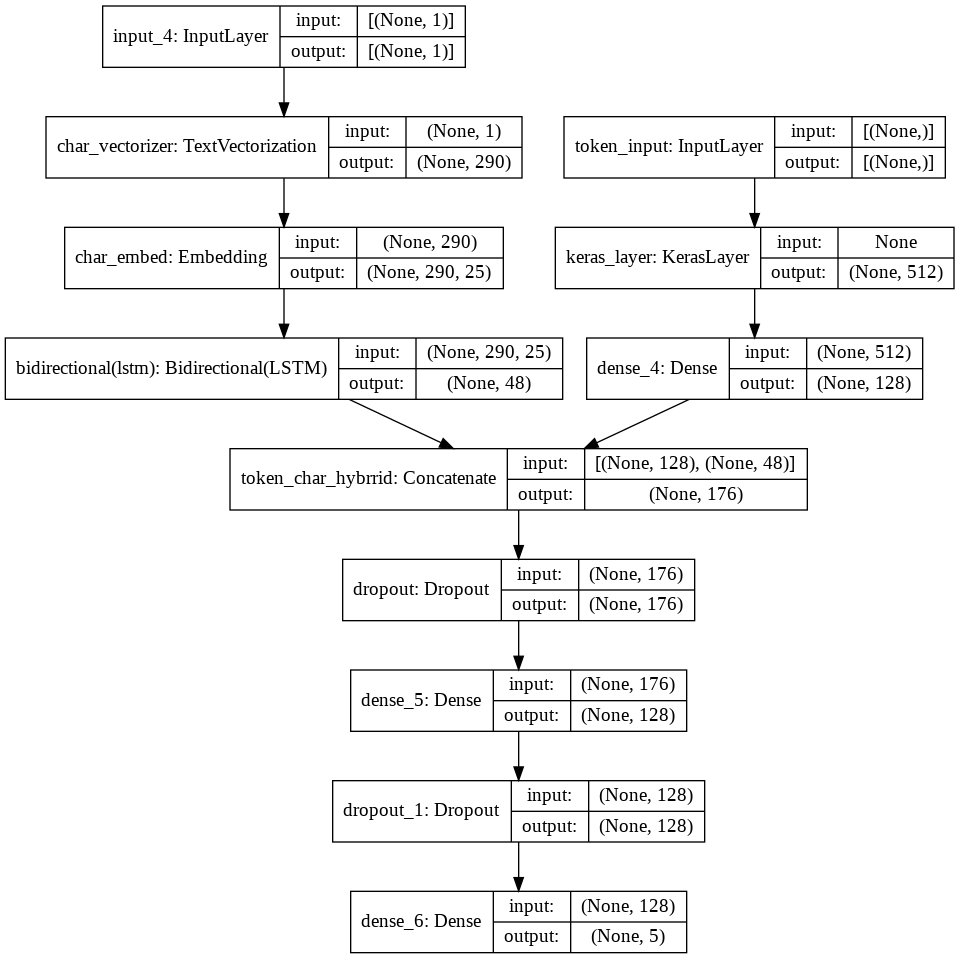

In [ ]:
from tensorflow.keras.utils import plot_model 
plot_model(model_4,show_shapes= True)

In [ ]:
# combining the token and the character level input in tf.dataset 
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_scentences,train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))

# prefetching and batching the train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
valid_char_token_data = tf.data.Dataset.from_tensor_slices((val_scentences,val_chars))
vaild_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((valid_char_token_data, vaild_char_token_labels))

val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>)

In [ ]:
history_model_4 = model_4.fit(
    train_char_token_dataset, 
    steps_per_epoch = int(0.1* len(train_char_token_dataset)) ,
    validation_data = val_char_token_dataset , 
    validation_steps = int(0.1* len(val_char_token_dataset)),
    epochs = 5 , 
    callbacks = [tf.keras.callbacks.TensorBoard('/logs/hybrid_model_dataset')]
)

Epoch 1/5
562/562 [==============================] - 33s 48ms/step - loss: 0.9858 - accuracy: 0.6054 - val_loss: 0.7779 - val_accuracy: 0.7035
Epoch 2/5
562/562 [==============================] - 23s 42ms/step - loss: 0.8041 - accuracy: 0.6854 - val_loss: 0.7159 - val_accuracy: 0.7284
Epoch 3/5
562/562 [==============================] - 21s 38ms/step - loss: 0.7775 - accuracy: 0.7063 - val_loss: 0.6886 - val_accuracy: 0.7430
Epoch 4/5
562/562 [==============================] - 24s 44ms/step - loss: 0.7441 - accuracy: 0.7239 - val_loss: 0.6689 - val_accuracy: 0.7507
Epoch 5/5
562/562 [==============================] - 22s 40ms/step - loss: 0.7468 - accuracy: 0.7171 - val_loss: 0.6574 - val_accuracy: 0.7487


In [ ]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 18s 19ms/step - loss: 0.6654 - accuracy: 0.7462


[0.6654033660888672, 0.7461935877799988]

In [ ]:
model_4.save('/content/drive/MyDrive/SOM_models/SKIM_LIT/hybrid_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SOM_models/SKIM_LIT/hybrid_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SOM_models/SKIM_LIT/hybrid_model/assets


In [ ]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)

In [ ]:
model_4_pred_probs 

array([[5.9609479e-01, 2.1029711e-01, 6.8230857e-03, 1.7937869e-01,
        7.4063959e-03],
       [4.6156466e-01, 4.3481097e-01, 6.2380349e-03, 9.4393000e-02,
        2.9933271e-03],
       [3.5666499e-01, 4.6513069e-02, 7.4673630e-02, 4.9609375e-01,
        2.6054526e-02],
       ...,
       [4.1508063e-04, 2.0336963e-03, 4.7823969e-02, 1.2271765e-04,
        9.4960451e-01],
       [5.5744466e-03, 1.9602282e-02, 4.0835872e-01, 1.8770280e-03,
        5.6458747e-01],
       [2.5692961e-01, 4.8842570e-01, 2.1401429e-01, 9.8084556e-03,
        3.0821953e-02]], dtype=float32)

In [ ]:
model_4_preds = tf.argmax(model_4_pred_probs , axis=1 ) 
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_4_results = calculate_results(val_labels_encoded,model_4_preds)
model_4_results 

{'accuracy': 74.6193565470674,
 'f1': 0.7405572895426105,
 'precision': 0.7444469465019301,
 'recall': 0.746193565470674}

# Model 5 transfer learning with the pretrained token embeddings + character embeddings + positional embeddigns 

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
 #what do we have to do to make the positional embeddings making compatible with the model 
 # making positioal embeddings useful so that we can use them in our model 


# enginnering the features on the test time 


> any enginner feaatures used to train the model need to be available at the test time 


# preparing the additional embedding

In [ ]:
#figuring out how many different line numbers are there 
train_df['line_number'].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

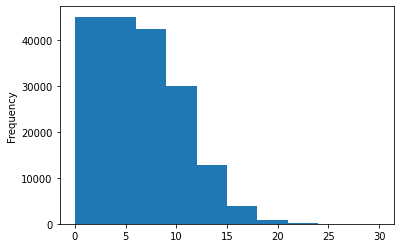

In [ ]:
# checking the distribution of the line number.plot 
train_df.line_number.plot.hist()

In [ ]:
# select the 15 first to do the one hot encoding the positional line numbers 
train_line_numbers_one_hot = tf.one_hot(train_df.line_number.to_numpy(),depth = 15 )

In [ ]:
train_line_numbers_one_hot[:10]

<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [ ]:
val_line_numbers_one_hot = tf.one_hot(val_df.line_number.to_numpy(),depth = 15 ) 
test_line_numbers_one_hot = tf.one_hot(test_df.line_number.to_numpy(),depth = 15 ) 

In [ ]:
val_line_numbers_one_hot[:5], test_line_numbers_one_hot[:5]

(<tf.Tensor: shape=(5, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>, <tf.Tensor: shape=(5, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>)

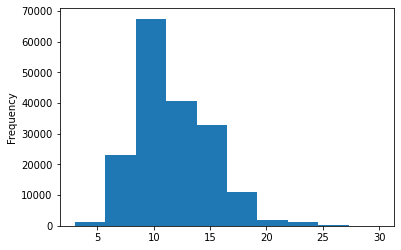

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df.total_lines.to_numpy(),depth = 20)

In [ ]:
train_total_lines_one_hot[:5]

<tf.Tensor: shape=(5, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [ ]:
val_total_lines_one_hot = tf.one_hot(val_df.total_lines.to_numpy(),depth = 20 ) 
test_total_lines_one_hot = tf.one_hot(test_df.total_lines.to_numpy(),depth = 20)

In [ ]:
val_total_lines_one_hot[:5], test_total_lines_one_hot[:5]

(<tf.Tensor: shape=(5, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(5, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 

In [ ]:
# what length covers the 95 % of hte abstract list 
np.percentile(train_df.total_lines,95)

18.0

# making the positional embedding and trying to put combine 3 models ( HYBRID MODEL ) 

1. create the a token level model 
2. create the character level model 
3. create the model for `line_number` feature 
4. create a model for `total_lines` feature 
5. combine the model for 1 and 2 usign tf.keras.concatenate 
6. combine the output s form 3,4,5 and combining it to get the outputs using tf.keras.layers.Concatenate 
7. creating the output layer to accept the tribid embedding and output level prediction 
8. combine the inptus of 1,2,3,4 in the tf.kears.Model

In [ ]:
train_total_lines_one_hot[:1]

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# 1 . token inputs 
token_inputs = tf.keras.layers.Input(shape = [], dtype = 'string', name = 'token_inputs')
token_embeddings = embed_model(token_inputs) 
token_outputs = tf.keras.layers.Dense(128, activation = 'relu')(token_embeddings)
token_model = tf.keras.Model(token_inputs , token_outputs)

# char inputs  
char_inputs = tf.keras.layers.Input(shape= (1,) , dtype = 'string' , name = 'clear_inputs')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = embedding(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs , char_bi_lstm)

# line numbers model 
line_inputs = tf.keras.layers.Input(shape = (15,),dtype = tf.float32 ,  name ='line_encodinngs')
line_dens = tf.keras.layers.Dense(32, activation = 'relu')(line_inputs) 
line_model = tf.keras.Model(line_inputs , line_dens)

# total_lines_model 
total_lines_inputs = tf.keras.layers.Input(shape = (20, ),dtype = tf.float32,name= 'line_numbering')
lines_dense = tf.keras.layers.Dense(32, activation = 'relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, lines_dense)

# combining the token and the 
combined_embeddings = layers.Concatenate(name = 'char_token_hybrid_embedding')([token_model.output, char_model.output])

z= tf.keras.layers.Dense(256, activation = 'relu')(combined_embeddings) 
z = tf.keras.layers.Dropout(0.5)(z)
# combiningn the positional embeddings wiht the toekn and char embeding 
tribid_embeddings = layers.Concatenate(name ='char_token_positional_embeddign')([line_model.output, total_lines_model.output,z])


# 7 creating the output layers 
output_layer = tf.keras.layers.Dense(5, activation = 'softmax', name = 'output_layer')(tribid_embeddings)

#putting together with the all kind of the inptus 
model_5 = tf.keras.Model(inputs = [line_model.input,
                                   total_lines_model.input,
                                   token_model.input,
                                   char_model.input], 
                         outputs = output_layer,
                         name = 'tribid_model_combined_model')

In [ ]:
model_5.summary()

Model: "tribid_model_combined_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
clear_inputs (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_inputs (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           clear_inputs[0][0]               
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 512)          256797824   token_inputs[0][0]               
________________________________________________________________________

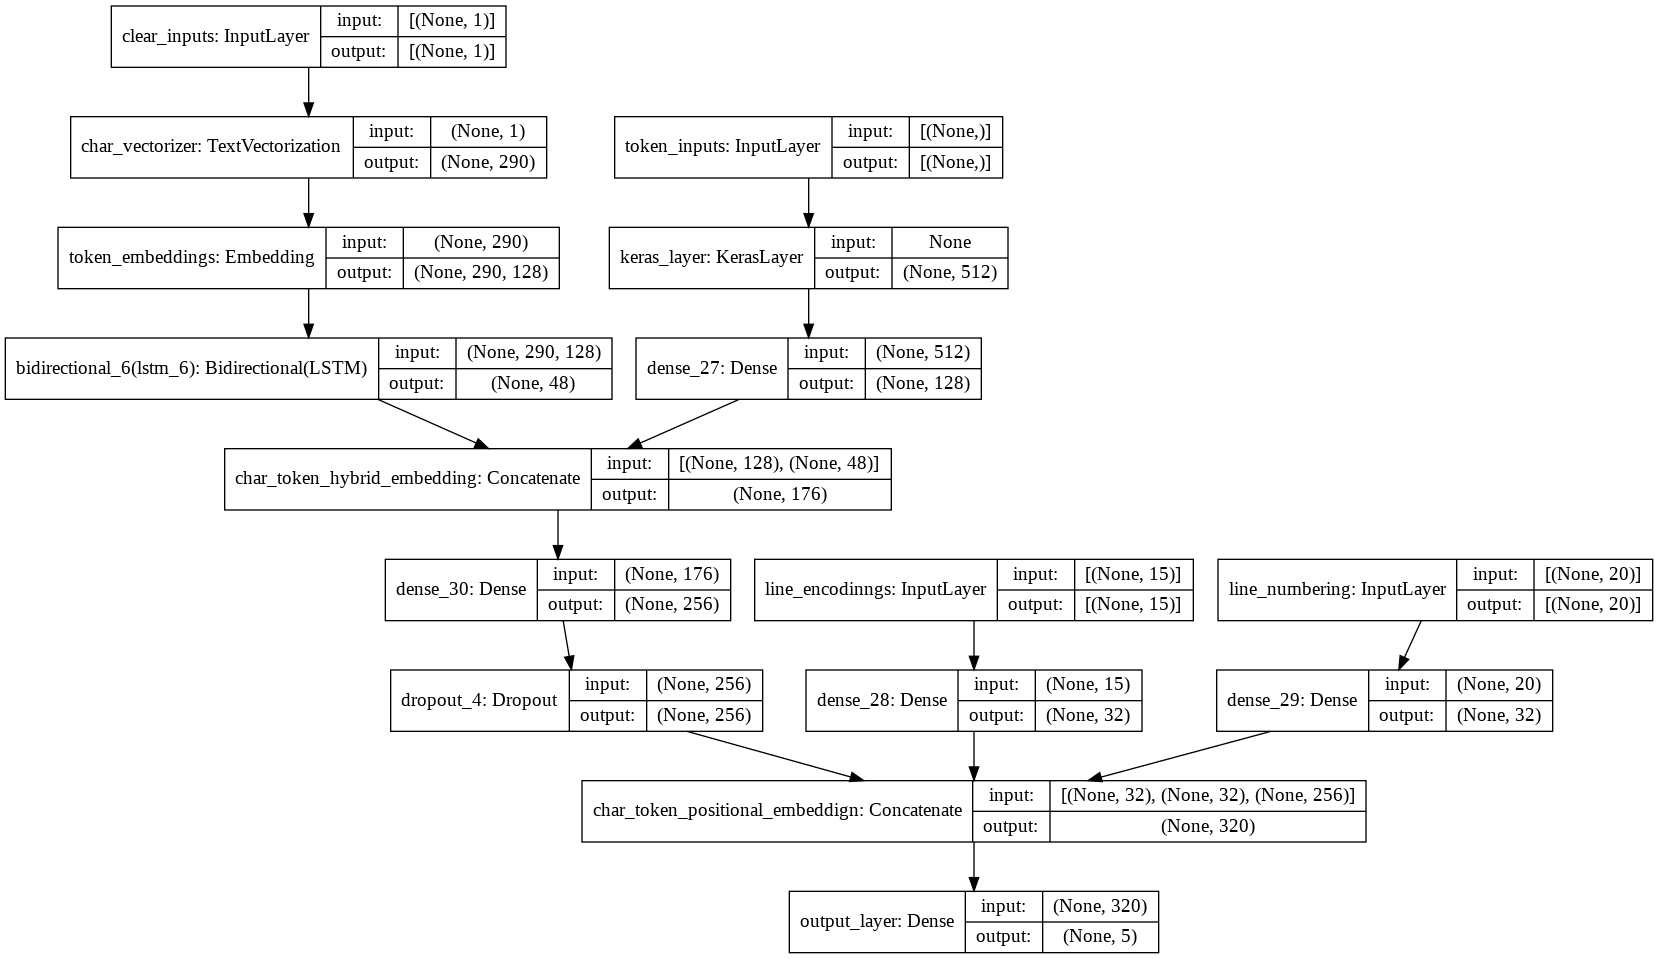

In [ ]:
#plotting the model architecture 
tf.keras.utils.plot_model(model_5,show_shapes=True)

In [ ]:
# compiling the token charge adn positioal miodel 
model_5.compile(loss =tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

what is the label smooting " 
when the model get too confidence on sigle class it may stuck on that classes and not learn the other classes 
realiy confidect : `[0.0, 0.0, 1.0, 0.0,0.0] `

what label smooting does : it assigns some of the value from teh highest pred prob to other classes in turn , hopefuly improving the generalization 
 `[0.01, 0.01, 0.96, 0.01,0.01] `

# preparing the data ( database ) for the model_5 

In [ ]:
# create the tribid dataset 
output_data = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_input_dataset = tf.data.Dataset.zip((token_and_char_dataset,output_data))
train_input_dataset = train_input_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_token_and_char_dataset = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,val_total_lines_one_hot,val_scentences, val_chars))
val_output_data = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_token_and_char_dataset,val_output_data))
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_input_dataset,val_dataset

(<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>)

In [ ]:
model_5_history = model_5.fit(train_input_dataset,
                              steps_per_epoch = int(0.1 * len(train_input_dataset)),
                                validation_data = val_dataset, 
                              validation_steps = int(0.1 * len(val_dataset)),
                              epochs = 5 ,
                              callbacks = [tf.keras.callbacks.TensorBoard('/logs/big_model_skim_lit')]
                              )

Epoch 1/5
562/562 [==============================] - 171s 250ms/step - loss: 1.0967 - accuracy: 0.7236 - val_loss: 0.9837 - val_accuracy: 0.8015
Epoch 2/5
562/562 [==============================] - 136s 243ms/step - loss: 0.9671 - accuracy: 0.8156 - val_loss: 0.9486 - val_accuracy: 0.8275
Epoch 3/5
562/562 [==============================] - 134s 239ms/step - loss: 0.9502 - accuracy: 0.8230 - val_loss: 0.9372 - val_accuracy: 0.8334
Epoch 4/5
562/562 [==============================] - 138s 245ms/step - loss: 0.9396 - accuracy: 0.8343 - val_loss: 0.9283 - val_accuracy: 0.8391
Epoch 5/5
562/562 [==============================] - 136s 241ms/step - loss: 0.9355 - accuracy: 0.8355 - val_loss: 0.9220 - val_accuracy: 0.8418


In [ ]:
model_5.evaluate(val_dataset)

945/945 [==============================] - 20s 21ms/step - loss: 0.9208 - accuracy: 0.8435


[0.9208245277404785, 0.8435059189796448]

In [ ]:
model_5_pred_probs = model_5.predict(val_dataset,verbose = 1 ) 
model_5_pred_probs

945/945 [==============================] - 20s 19ms/step


array([[0.5835692 , 0.090576  , 0.01557337, 0.28925648, 0.02102488],
       [0.6093745 , 0.08593331, 0.10090723, 0.19183433, 0.01195065],
       [0.40777698, 0.10699074, 0.12911879, 0.3051068 , 0.05100671],
       ...,
       [0.03266091, 0.0660799 , 0.0309753 , 0.02666174, 0.8436222 ],
       [0.02216581, 0.26810777, 0.10398093, 0.02224635, 0.58349913],
       [0.07447693, 0.7467809 , 0.08709255, 0.02011878, 0.07153092]],
      dtype=float32)

In [ ]:
model_5_preds = tf.argmax(model_5_pred_probs, axis = 1) 
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 1])>

In [ ]:
model_5_result = calculate_results(val_labels_encoded,model_5_preds)

In [ ]:
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 1])>

# comparing the model results 

In [ ]:
# combine the model results into the dataframe
all_model_results = pd.DataFrame({
    'model_0_baseline' : baseline_results, 
    # 'model_1_custom_token_embedding' : model_, 
    'model_2_pretrained_token_embedding' : model_2_results,
    'model_3_custom_char_embedding':model_3_score,
    'model_4_hybrid_character_token_embedding':model_4_results,
    'model_5_pos_char_token_embedding': model_5_result
})

In [ ]:
all_model_results = all_model_results.transpose()

In [ ]:
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_2_pretrained_token_embedding,73.381438,0.729969,0.733814,0.727954
model_3_custom_char_embedding,68.241096,0.682468,0.682411,0.678082
model_4_hybrid_character_token_embedding,74.619357,0.744447,0.746194,0.740557
model_5_pos_char_token_embedding,84.350589,0.846406,0.843506,0.839605


In [ ]:
all_model_results.accuracy = all_model_results.accuracy/100

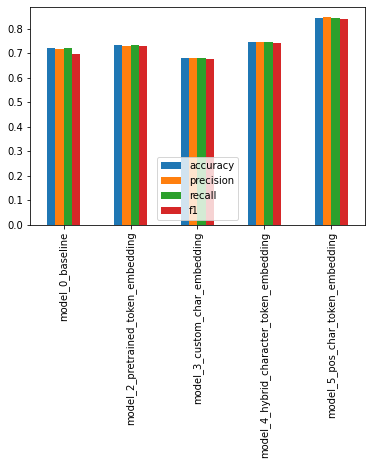

In [ ]:
all_model_results.plot.bar()

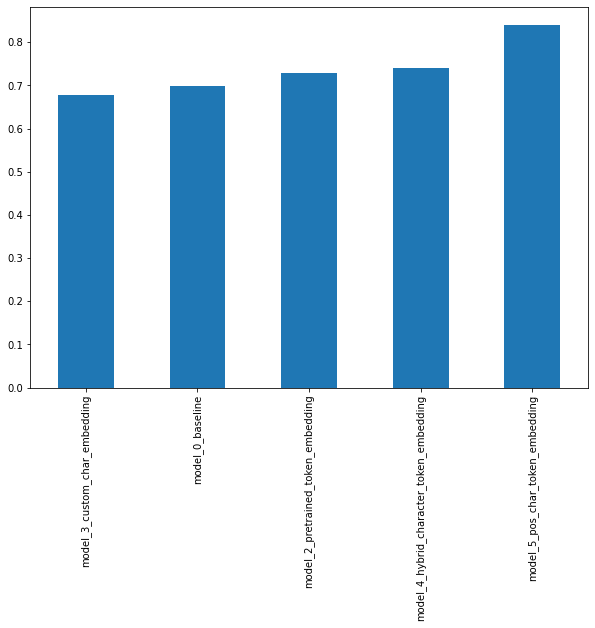

In [ ]:
all_model_results.sort_values('f1',ascending= True)['f1'].plot(kind= 'bar',figsize = (10,7))

In [ ]:
# model_5.save('/content/drive/MyDrive/SOM_models/SKIM_LIT/big_model_4_ip')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SOM_models/SKIM_LIT/big_model_4_ip/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SOM_models/SKIM_LIT/big_model_4_ip/assets


In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/SOM_models/SKIM_LIT/big_model_4_ip')

In [ ]:
loaded_model.evaluate(val_dataset)

945/945 [==============================] - 22s 21ms/step - loss: 0.9208 - accuracy: 0.8435


[0.9208245277404785, 0.8435059189796448]

# Download and load in pretrained model from google storage 


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip

--2021-06-18 12:38:33--  https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 962957902 (918M) [application/zip]
Saving to: ‘skimlit_tribrid_model.zip’

skimlit_tribrid_mod 100%[===================>] 918.35M  60.9MB/s    in 14s     

2021-06-18 12:38:48 (67.0 MB/s) - ‘skimlit_tribrid_model.zip’ saved [962957902/962957902]



In [ ]:
!unzip skimlit_tribrid_model.zip

Archive:  skimlit_tribrid_model.zip
   creating: skimlit_tribrid_model/
   creating: skimlit_tribrid_model/assets/
   creating: skimlit_tribrid_model/variables/
  inflating: skimlit_tribrid_model/variables/variables.index  
  inflating: skimlit_tribrid_model/variables/variables.data-00000-of-00001  
  inflating: skimlit_tribrid_model/saved_model.pb  


In [ ]:
daniel_model = tf.keras.models.load_model('/content/skimlit_tribrid_model')

In [ ]:
# evaluating the daniels model 
daniel_model.evaluate(val_dataset)

945/945 [==============================] - 22s 21ms/step - loss: 0.9459 - accuracy: 0.8283


[0.9459028244018555, 0.8283132314682007]

In [ ]:
test_df.head()

,target,text,line_number,total_lines
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8
1,RESULTS,a post hoc analysis was conducted with the use...,1,8
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8
3,RESULTS,survival analyses were used to assess the asso...,3,8
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8


In [ ]:
test_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

In [ ]:
print('text')

text


In [2]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
class_names = ['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS']

def get_model(model_path):
    model = tf.keras.models.load_model(model_path)
    return model 

def split_char(text):
  return " ".join(list(text))

def preprocess_text(text):
    sample = []
    
    splitted_text = text.splitlines()

    for line_no,line in enumerate(splitted_text):
        line_data  = {}
        target_text = line.lower().replace('!@#$%^&*:",.<>',"")
        line_data['text'] = target_text.lower()
        line_data['line_number'] = line_no
        line_data['total_lines'] = len(splitted_text)- 1 
        sample.append(line_data)
    
    dataframe = pd.DataFrame(sample)
    
    textual_data_to_feed = dataframe.text.to_numpy()
    line_numbers_encoded = tf.one_hot(dataframe.line_number.to_numpy(),depth = 15)
    
    total_lines_encoded = tf.one_hot(dataframe.total_lines.to_numpy(),depth = 20)
    
    text_characters = [split_char(scentence) for scentence in textual_data_to_feed]
    return line_numbers_encoded,total_lines_encoded,textual_data_to_feed,text_characters
    

def predict_on_text(text,model):
    line_numbers,total_lines,text_data, text_char  = preprocess_text(text)
    prediction = model.predict((line_numbers,total_lines,tf.cast(text_data,'string'),tf.cast(text_char,'string')))
    array_of_preds = list(tf.argmax(prediction , axis = 1).numpy())
    pred_with_label = [class_names[x] for x in array_of_preds]

    return text_data, pred_with_label

In [3]:
predict_on_text('this is the new text ', tf.keras.models.load_model('/content/drive/MyDrive/SOM_models/SKIM_LIT/big_model_4_ip'))

(array(['this is the new text '], dtype=object), ['BACKGROUND'])